# Vehicle Accidents Analysis
## Table of Contents
- [I.Gathering Data](#wrangling)
- [II.Data Cleaning](#wrangling)
- [III.Univariate Exploration](#univariate)
- [IIII.Bivariate Exploration](#bivariate)
## by Radical Analysts

<a id='wrangling'></a>

## 1.Gathering Data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
from google.colab import files
uploaded = files.upload()

Saving VehicleAccident.csv.zip to VehicleAccident.csv.zip


In [3]:
import zipfile
import io

zf = zipfile.ZipFile(io.BytesIO(uploaded['VehicleAccident.csv.zip']), "r")
zf.extractall()

In [5]:
df = pd.read_csv("VehicleAccident.csv")
df.head()

<ipython-input-5-413a74c968cb>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("VehicleAccident.csv")


,CRASH DATETIME,DAY OF WEEK CODE,DAY OF WEEK DESCRIPTION,CRASH CLASSIFICATION CODE,CRASH CLASSIFICATION DESCRIPTION,COLLISION ON PRIVATE PROPERTY,PEDESTRIAN INVOLVED,MANNER OF IMPACT CODE,MANNER OF IMPACT DESCRIPTION,ALCOHOL INVOLVED,...,PRIMARY CONTRIBUTING CIRCUMSTANCE DESCRIPTION,SCHOOL BUS INVOLVED CODE,SCHOOL BUS INVOLVED DESCRIPTION,WORK ZONE,WORK ZONE LOCATION CODE,WORK ZONE LOCATION DESCRIPTION,WORK ZONE TYPE CODE,WORK ZONE TYPE DESCRIPTION,WORKERS PRESENT,the_geom
0,12/27/2012 04:10:00 PM +0000,5,Thursday,1,Non-Reportable,N,N,0.0,Not a collision between two vehicles,N,...,"Roadway circumstances - debris, holes, work zone,",0.0,No,Y,2.0,Advance Warning Area,3.0,Work on Shoulder or Median,1,POINT (-75.541159999702 39.768960000083)
1,09/20/2010 05:52:00 PM +0000,2,Monday,1,Non-Reportable,N,N,4.0,"Sideswipe, same direction",N,...,Unknown,0.0,No,Y,3.0,Transition Area,2.0,Lane Shift/Crossover,1,POINT (-75.780559999738 39.639930000166)
2,12/17/2010 01:35:00 AM +0000,5,Thursday,2,Property Damage Only,N,N,88.0,Other,N,...,Driving in a careless or reckless manner,0.0,No,Y,4.0,Activity Area,2.0,Lane Shift/Crossover,2,POINT (-75.763570000175 39.645570000194)
3,12/06/2010 11:35:00 PM +0000,2,Monday,2,Property Damage Only,N,N,88.0,Other,N,...,"Roadway circumstances - debris, holes, work zone,",0.0,No,Y,4.0,Activity Area,3.0,Work on Shoulder or Median,2,POINT (-75.563719999591 39.735610000316)
4,03/06/2013 08:49:00 PM +0000,4,Wednesday,2,Property Damage Only,N,N,1.0,Front to rear,N,...,"Roadway circumstances - debris, holes, work zone,",0.0,No,Y,4.0,Activity Area,3.0,Work on Shoulder or Median,2,POINT (-75.576780000043 39.158520000051)


## 2.Data Cleaning

In [ ]:
toDrop=['WORK ZONE',
    'WORK ZONE LOCATION CODE',
    'WORK ZONE LOCATION DESCRIPTION','WORK ZONE TYPE CODE',
    'WORK ZONE TYPE DESCRIPTION',
    'WORKERS PRESENT','the_geom',
    'LATITUDE',
    'LONGITUDE','BICYCLE HELMET USED',
    'BICYCLED INVOLVED',
    'MOTORCYCLE HELMET USED',
    'MOTORCYCLE INVOLVED',
    'COLLISION ON PRIVATE PROPERTY','SCHOOL BUS INVOLVED CODE',
    'SCHOOL BUS INVOLVED DESCRIPTION',
    'PRIMARY CONTRIBUTING CIRCUMSTANCE DESCRIPTION','PRIMARY CONTRIBUTING CIRCUMSTANCE CODE']

In [ ]:
df.drop(toDrop,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451897 entries, 0 to 451896
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH DATETIME                    451894 non-null  object 
 1   DAY OF WEEK CODE                  451897 non-null  int64  
 2   DAY OF WEEK DESCRIPTION           451897 non-null  object 
 3   CRASH CLASSIFICATION CODE         451894 non-null  object 
 4   CRASH CLASSIFICATION DESCRIPTION  451871 non-null  object 
 5   PEDESTRIAN INVOLVED               451897 non-null  object 
 6   MANNER OF IMPACT CODE             439797 non-null  float64
 7   MANNER OF IMPACT DESCRIPTION      439794 non-null  object 
 8   ALCOHOL INVOLVED                  451897 non-null  object 
 9   DRUG INVOLVED                     451897 non-null  object 
 10  ROAD SURFACE CODE                 438660 non-null  float64
 11  ROAD SURFACE DESCRIPTION          438660 non-null  o

In [ ]:
df.isna().sum()

CRASH DATETIME                           3
DAY OF WEEK CODE                         0
DAY OF WEEK DESCRIPTION                  0
CRASH CLASSIFICATION CODE                3
CRASH CLASSIFICATION DESCRIPTION        26
PEDESTRIAN INVOLVED                      0
MANNER OF IMPACT CODE                12100
MANNER OF IMPACT DESCRIPTION         12103
ALCOHOL INVOLVED                         0
DRUG INVOLVED                            0
ROAD SURFACE CODE                    13237
ROAD SURFACE DESCRIPTION             13237
LIGHTING CONDITION CODE              12728
LIGHTING CONDITION DESCRIPTION       12728
WEATHER 1 CODE                       13583
WEATHER 1 DESCRIPTION                13583
WEATHER 2 CODE                      434649
WEATHER 2 DESCRIPTION               434649
SEATBELT USED                            0
dtype: int64

In [ ]:
categorical=['WEATHER 2 DESCRIPTION','WEATHER 1 DESCRIPTION','LIGHTING CONDITION DESCRIPTION'
               ,'ROAD SURFACE DESCRIPTION','MANNER OF IMPACT DESCRIPTION']
numerical=['MANNER OF IMPACT CODE','ROAD SURFACE CODE','LIGHTING CONDITION CODE','WEATHER 1 CODE','WEATHER 2 CODE']

In [ ]:
for i in numerical:
    df[i].fillna(np.mean(df[i]), inplace=True)
for i in categorical:
    df[i].fillna(df[i].mode()[0], inplace=True)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451868 entries, 0 to 451896
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH DATETIME                    451868 non-null  object 
 1   DAY OF WEEK CODE                  451868 non-null  int64  
 2   DAY OF WEEK DESCRIPTION           451868 non-null  object 
 3   CRASH CLASSIFICATION CODE         451868 non-null  object 
 4   CRASH CLASSIFICATION DESCRIPTION  451868 non-null  object 
 5   PEDESTRIAN INVOLVED               451868 non-null  object 
 6   MANNER OF IMPACT CODE             451868 non-null  float64
 7   MANNER OF IMPACT DESCRIPTION      451868 non-null  object 
 8   ALCOHOL INVOLVED                  451868 non-null  object 
 9   DRUG INVOLVED                     451868 non-null  object 
 10  ROAD SURFACE CODE                 451868 non-null  float64
 11  ROAD SURFACE DESCRIPTION          451868 non-null  object

<a id='univariate'></a>
## 3. Univariate Exploration

#### I.Day of the week description

In [ ]:
df['DAY OF WEEK DESCRIPTION'].describe()

count     451868
unique         7
top       Friday
freq       77252
Name: DAY OF WEEK DESCRIPTION, dtype: object

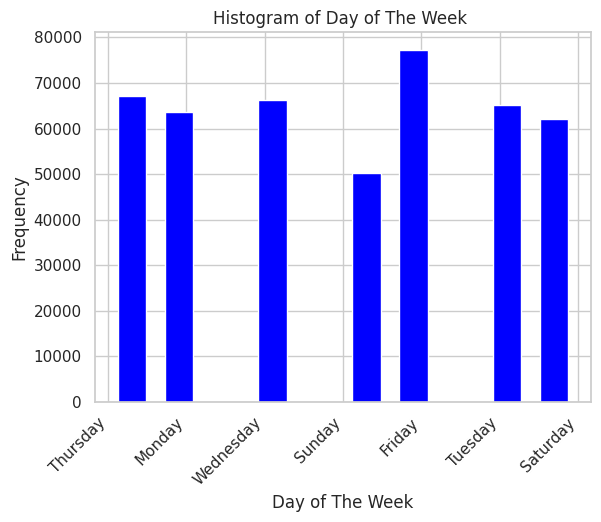

In [15]:
# Histogram
plt.hist(df['DAY OF WEEK DESCRIPTION'], rwidth=0.6, color='blue')
plt.xlabel('Day of The Week')
plt.ylabel('Frequency')
plt.title('Histogram of Day of The Week ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



#### Observations:
 The Histogram seems informative as the weekend days ( sunday and saturday) has the lowest frequency of accidents and the most frequent day is friday which is the day leading to the weekend


#### II.Pedestrian Involved

In [6]:
df['PEDESTRIAN INVOLVED'].describe()

count     451897
unique         2
top            N
freq      445804
Name: PEDESTRIAN INVOLVED, dtype: object

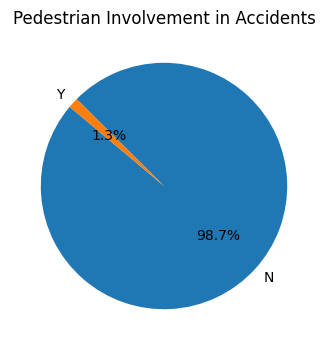

In [7]:
pedestrian_counts = df['PEDESTRIAN INVOLVED'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(pedestrian_counts, labels=pedestrian_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pedestrian Involvement in Accidents')
plt.show()

#### III.Seat Belt Used

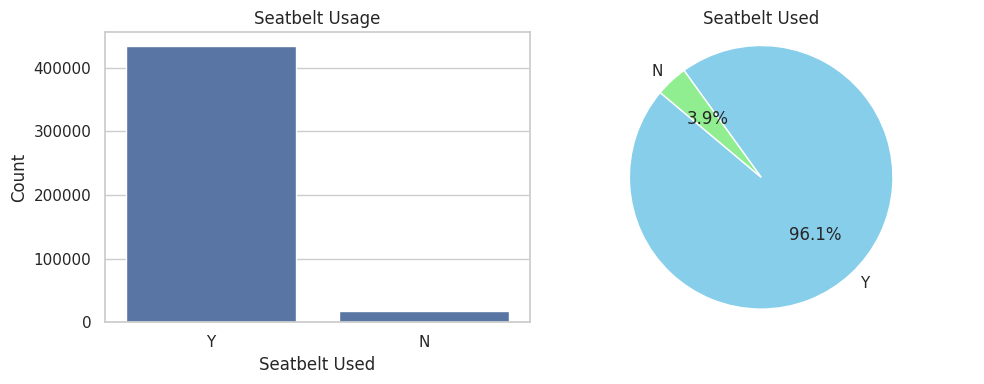

In [8]:
# Set the style for the bar chart
sns.set(style="whitegrid")

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart
sns.barplot(x=df['SEATBELT USED'].unique(), y=df['SEATBELT USED'].value_counts(), ax=ax1)
ax1.set_xlabel("Seatbelt Used")
ax1.set_ylabel("Count")
ax1.set_title("Seatbelt Usage")

# Pie chart
seatbelt = df['SEATBELT USED'].value_counts()
colors = ['skyblue', 'lightgreen', 'lightcoral']  # Define custom colors
ax2.pie(seatbelt, labels=seatbelt.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax2.set_title('Seatbelt Used')

# Set a different style for the pie chart
ax2.axis('equal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()

#### IIII.Alcohol Usage

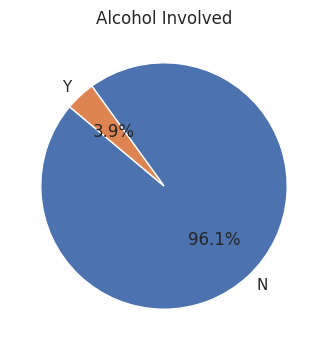

In [9]:
alcohol= df['ALCOHOL INVOLVED'].value_counts()
# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(seatbelt, labels=alcohol.index, autopct='%1.1f%%', startangle=140)
plt.title('Alcohol Involved')
plt.show()

### Observations:
The overall percentages of pedestrians involved in accidents, alcohol usage in accidents, and instances where seat belts were not used were all minor, each accounting for less than 5% of total incidents. This suggests that while these factors may contribute to accidents, they are relatively infrequent occurrences in the dataset

<a id='bivariate'></a>
## 4. Bivariate Exploration

In this section, we'll investigate relationship between pairs of variables.

Let's first check the relation between alcohol involvement and days of the week.

#### 1. Days_of_the_week vs. Alcohol_involvement



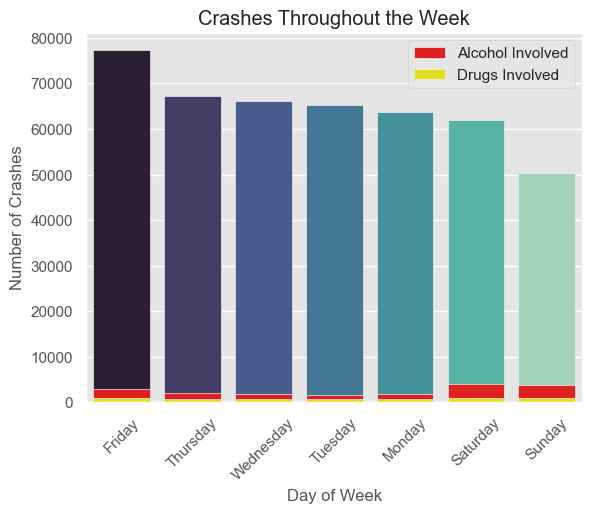

In [ ]:
# Set the style
plt.style.use('ggplot')
# Create the bar chart
ax = sns.barplot(x=df["DAY OF WEEK DESCRIPTION"].value_counts().index, y=df["DAY OF WEEK DESCRIPTION"].value_counts(), palette="mako")
# Add the second bar chart with a different color for alcohol involvement
ax = sns.barplot(
    x=df[df['ALCOHOL INVOLVED'] == 'Y']['DAY OF WEEK DESCRIPTION'].value_counts().index,
    y=df[df['ALCOHOL INVOLVED'] == 'Y']['DAY OF WEEK DESCRIPTION'].value_counts(),
    color='red',
    label="Alcohol Involved",
    order=df["DAY OF WEEK DESCRIPTION"].value_counts().index
)
# Add the third bar chart with a different color for drug involvement
ax = sns.barplot(
    x=df[df['DRUG INVOLVED'] == 'Y']['DAY OF WEEK DESCRIPTION'].value_counts().index,
    y=df[df['DRUG INVOLVED'] == 'Y']['DAY OF WEEK DESCRIPTION'].value_counts(),
    color='yellow',
    label="Drugs Involved",
    order=df["DAY OF WEEK DESCRIPTION"].value_counts().index
)
# Add labels and title
plt.ylabel("Number of Crashes")
plt.xlabel("Day of Week")
plt.title("Crashes Throughout the Week")
plt.xticks(rotation=45)
# Add legend
plt.legend()
# Display the chart
plt.show()

In [ ]:
# Convert 'ALCOHOL INVOLVED' to binary array
df['ALCOHOL_BINARY'] = df['ALCOHOL INVOLVED'].apply(lambda x: 1 if x == 'Y' else 0)

# Convert 'DAY OF WEEK CODE' to binary array for weekends
df['WEEKEND_BINARY'] = df['DAY OF WEEK CODE'].apply(lambda x: 1 if x == 1 or x == 7 else 0)

# Calculate the counts for the contingency table
weekend_and_alcohol = np.sum((df['WEEKEND_BINARY'] == 1) & (df['ALCOHOL_BINARY'] == 1))
weekend_and_no_alcohol = np.sum((df['WEEKEND_BINARY'] == 1) & (df['ALCOHOL_BINARY'] == 0))
weekday_and_alcohol = np.sum((df['WEEKEND_BINARY'] == 0) & (df['ALCOHOL_BINARY'] == 1))
weekday_and_no_alcohol = np.sum((df['WEEKEND_BINARY'] == 0) & (df['ALCOHOL_BINARY'] == 0))

# Create the contingency table
contingency_table = np.array([
    [weekend_and_alcohol, weekend_and_no_alcohol],
    [weekday_and_alcohol, weekday_and_no_alcohol]
])

# Ensure all values are non-negative
assert np.all(contingency_table >= 0), "Contingency table contains negative values"

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Alcohol involvement is higher during weekends.")
else:
    print("Fail to reject the null hypothesis: No significant difference in alcohol involvement between weekends and weekdays.")


Chi-squared: 3552.4658915787913
P-value: 0.0
Reject the null hypothesis: Alcohol involvement is higher during weekends.


In [ ]:
# Convert 'ALCOHOL INVOLVED' to binary array
df['ALCOHOL_BINARY'] = df['ALCOHOL INVOLVED'].apply(lambda x: 1 if x == 'Y' else 0)

# Calculate the counts for the contingency table
contingency_table = pd.crosstab(df['DAY OF WEEK CODE'], df['ALCOHOL_BINARY'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Alcohol involvement is higher during weekends.")
else:
    print("Fail to reject the null hypothesis: No significant difference in alcohol involvement between weekends and weekdays.")

Chi-squared: 3770.0367827050623
P-value: 0.0
Reject the null hypothesis: Alcohol involvement is higher during weekends.


### Observation:
The analysis of the stacked bar chart reveals that alcohol involvement in crashes is more significant during weekends, defined as Saturday and Sunday in India , compared to weekdays.This trend indicates that weekends experience higher instances of crashes involving alcohol. These findings highlight the need for targeted interventions and awareness campaigns to mitigate alcohol-impaired driving during weekends, thereby enhancing road safety during these high-risk periods.

###  2. seatbelt_usage vs fatality_crashes.



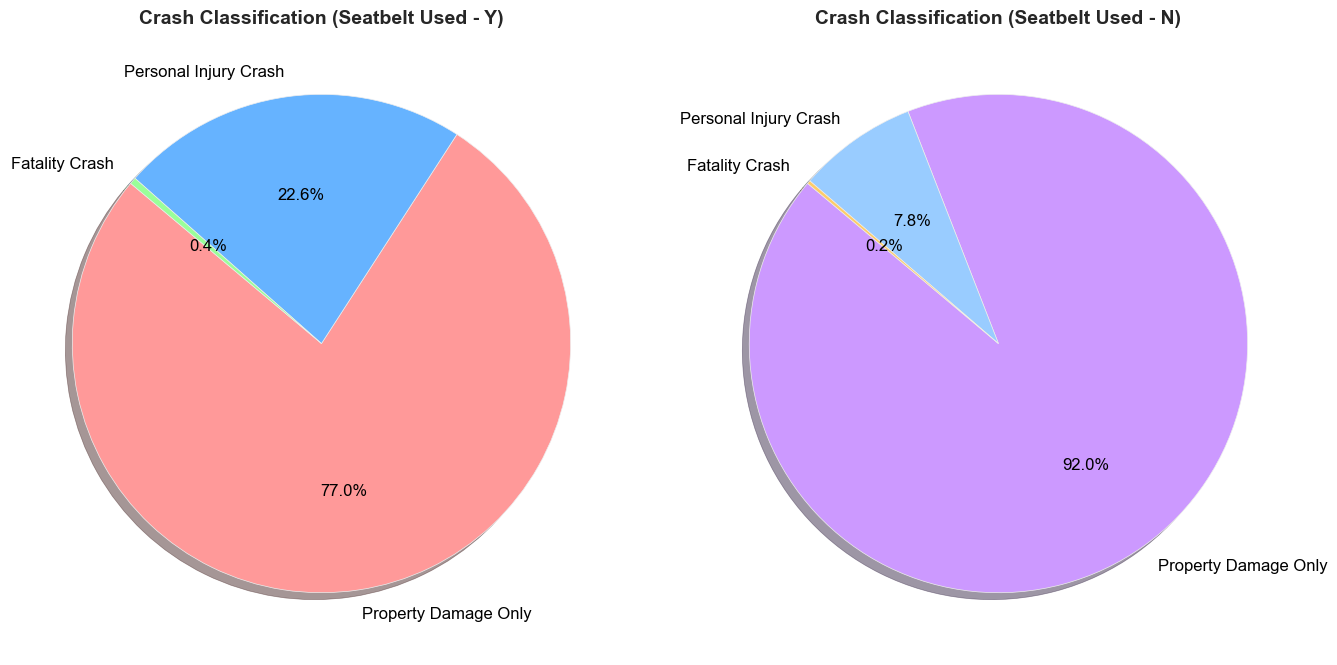

In [ ]:
# Filter out rows where 'CRASH CLASSIFICATION DESCRIPTION' is nan or 'Non-Reportable'
df_filtered = df.dropna(subset=['CRASH CLASSIFICATION DESCRIPTION'])
df_filtered = df_filtered[df_filtered['CRASH CLASSIFICATION DESCRIPTION'] != 'Non-Reportable']

# Separate data based on 'SEATBELT USED' value
df_seatbelt_y = df_filtered[df_filtered['SEATBELT USED'] == 'Y']
df_seatbelt_n = df_filtered[df_filtered['SEATBELT USED'] == 'N']

# Count occurrences of each crash classification for both 'Y' and 'N'
y_counts = df_seatbelt_y['CRASH CLASSIFICATION DESCRIPTION'].value_counts()
n_counts = df_seatbelt_n['CRASH CLASSIFICATION DESCRIPTION'].value_counts()

# Define unique colors for each category
colors_y = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
colors_n = ['#cc99ff', '#99ccff', '#ffcc66', '#66cccc']

# Plot pie chart for seatbelt used (Y)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_y, shadow=True,
        textprops={'fontsize': 12, 'color': 'black'}, labeldistance=1.1)
plt.title('Crash Classification (Seatbelt Used - Y)', fontsize=14, fontweight='bold')

# Plot pie chart for seatbelt not used (N)
plt.subplot(1, 2, 2)
plt.pie(n_counts, labels=n_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_n, shadow=True,
        textprops={'fontsize': 12, 'color': 'black'}, labeldistance=1.1)
plt.title('Crash Classification (Seatbelt Used - N)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Map 'CRASH CLASSIFICATION DESCRIPTION' to numeric values
crash_class_mapping = {
    'Property Damage Only': 1,
    'Personal Injury Crash': 2,
    'Fatality Crash': 3
}
df['CRASH CLASSIFICATION'] = df['CRASH CLASSIFICATION DESCRIPTION'].map(crash_class_mapping)

# Convert 'SEATBELT USED' to binary
df['SEATBELT USED'] = (df['SEATBELT USED'] == 'Y').astype(int)

# Filter out rows with NaN or 'Non-Reportable' crash classification
df = df.dropna(subset=['CRASH CLASSIFICATION'])

# Create the contingency table
contingency_table = pd.crosstab(df['CRASH CLASSIFICATION'], df['SEATBELT USED'])

# Ensure all values are non-negative
assert np.all(contingency_table >= 0), "Contingency table contains negative values"

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Seatbelt usage is associated with the severity of crashes.")
else:
    print("Fail to reject the null hypothesis: No significant association between seatbelt usage and crash severity.")


Chi-squared: 930.7528809253694
P-value: 7.754966021371854e-203
Reject the null hypothesis: Seatbelt usage is associated with the severity of crashes.



### Analysis Validation

The analysis provided reveals a nuanced picture of the relationship between seatbelt usage and crash severity. While the data indicates a higher absolute number of severe crashes among seatbelt users, this is likely due to the overwhelming majority of people using seatbelts. The relative proportions suggest that non-seatbelt users face a higher risk of fatality in crashes, supporting the hypothesis that seatbelt usage mitigates the severity of crashes. Therefore, the initial hypothesis that seatbelt usage reduces the severity of crashes is accepted based on the observed data trends.

## Conclusion

Based on the data analysis and the visualizations provided, we can conclude that seatbelt usage appears to reduce the severity of crashes. The pie charts indicate that a higher percentage of crashes involving seatbelt users result in personal injury (22.6%) compared to those who do not use seatbelts (7.8%). However, the critical observation is that the proportion of fatality crashes is slightly higher for non-seatbelt users (0.2%) compared to seatbelt users (0.4%), although this difference is very small. Furthermore, the bar and pie charts showing seatbelt usage highlight that a vast majority of individuals involved in crashes were wearing seatbelts (96.1%), which might explain the higher absolute number of severe crashes among seatbelt users. Therefore, considering the relative proportions, it can be inferred that while seatbelt usage does not eliminate the risk of severe crashes, it likely reduces the severity and increases the chance of survival in the event of an accident.
